In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error # For Regression
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
extTree = ExtraTreesRegressor(random_state = 12)

In [3]:
f = open('/Users/shreyassrinivasan/Desktop/SF_Project/merge_final.csv')
df = pd.read_csv(f)

In [4]:
df = df.dropna()

In [5]:
df

,Unnamed: 0,Unnamed: 0_x,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,...,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,date_y,time_y,airport_y
0,0,529,2016,4,12,1,2016-12-01,11298,DFW,12892,...,1014,0,59,10,69,67,73,2016-12-01,1700,LAX
1,1,243575,2016,4,12,1,2016-12-01,11298,DFW,12892,...,1014,0,59,10,69,67,73,2016-12-01,1700,LAX
2,2,33638,2016,4,12,1,2016-12-01,13930,ORD,12892,...,1014,0,59,10,69,67,73,2016-12-01,1700,LAX
3,3,64939,2016,4,12,1,2016-12-01,13303,MIA,12892,...,1014,0,59,10,69,67,73,2016-12-01,1700,LAX
4,4,63972,2016,4,12,1,2016-12-01,14771,SFO,12892,...,1014,0,59,10,69,67,73,2016-12-01,1700,LAX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877189,1877189,5587516,2017,1,2,25,2017-02-25,11298,DFW,14107,...,1014,100,32,10,57,57,39,2017-02-26,0,PHX
1877190,1877190,5604625,2017,1,2,19,2017-02-19,12889,LAS,12892,...,1010,100,51,5,52,52,95,2017-02-19,600,LAX
1877191,1877191,5631975,2017,1,2,18,2017-02-18,12889,LAS,12892,...,1000,100,50,32,53,49,92,2017-02-18,600,LAX
1877192,1877192,5660860,2017,1,2,25,2017-02-25,12889,LAS,12892,...,1020,36,45,13,47,45,93,2017-02-25,600,LAX


In [6]:
# Columns to be dropped

"""
Unnamed: 0
Unnamed: 0_x
DepDel15
ArrTime
FlightDate
ArrFlightDate
ArrAbsTime
DepAbsTime
Unnamed: 0_y
date_x
time_x
airport_x
Unnamed: 0.1
date_y
time_y
airport_y
OriginAirportID
DestAirportID
DepDelayMinutes
"""

x = df.drop(['Unnamed: 0','Unnamed: 0_x','DepDel15','ArrTime','ArrFlightDate','ArrAbsTime','DepAbsTime','Unnamed: 0_y','date_x','time_x','airport_x','Unnamed: 0.1',
            'date_y','time_y','airport_y','FlightDate','OriginAirportID','DestAirportID','DepDelayMinutes','Origin','Dest'],axis=1)

In [7]:
x.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1877184,1877185,1877186,1877187,1877188,1877189,1877190,1877191,1877192,1877193
Year,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,...,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0
Quarter,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Month,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
DayofMonth,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,12.0,11.0,10.0,4.0,11.0,25.0,19.0,18.0,25.0,26.0
CRSDepTime,1630.0,1600.0,1505.0,1415.0,1550.0,1625.0,1725.0,1450.0,1555.0,1501.0,...,550.0,550.0,550.0,2326.0,2328.0,2328.0,550.0,550.0,550.0,550.0
DepTime,1630.0,1650.0,1502.0,1424.0,1543.0,1624.0,1733.0,1451.0,1609.0,1520.0,...,556.0,543.0,548.0,2317.0,2319.0,2325.0,548.0,548.0,546.0,547.0
CRSArrTime,1758.0,1741.0,1747.0,1719.0,1725.0,1755.0,1745.0,1726.0,1730.0,1710.0,...,755.0,755.0,755.0,55.0,58.0,58.0,655.0,655.0,655.0,655.0
ArrDelayMinutes,0.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,15.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
ArrDel15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
windspeedKmph_x,19.0,19.0,24.0,15.0,10.0,3.0,5.0,14.0,1.0,15.0,...,3.0,13.0,8.0,15.0,20.0,6.0,3.0,18.0,3.0,5.0


In [8]:
flightOrigin = {'DFW':1,'EWR':2,'IAH':3,'JFK':4,'LAS':5,'LAX':6,'MCO':7,'MIA':8,'ORD':9,'PHX':10,'SEA':11,'SFO':12,'ATL':13,'CLT':14,'DEN':15} 

In [9]:
arr1 = [df['Origin'].apply(lambda x: flightOrigin.get(x))]

In [10]:
arr2 = [df['Dest'].apply(lambda x: flightOrigin.get(x))]

In [11]:
x['newOrigin'] = arr1[0]

In [12]:
x['newDest'] = arr2[0]

In [13]:
x.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1877184,1877185,1877186,1877187,1877188,1877189,1877190,1877191,1877192,1877193
Year,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,...,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0
Quarter,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Month,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
DayofMonth,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,12.0,11.0,10.0,4.0,11.0,25.0,19.0,18.0,25.0,26.0
CRSDepTime,1630.0,1600.0,1505.0,1415.0,1550.0,1625.0,1725.0,1450.0,1555.0,1501.0,...,550.0,550.0,550.0,2326.0,2328.0,2328.0,550.0,550.0,550.0,550.0
DepTime,1630.0,1650.0,1502.0,1424.0,1543.0,1624.0,1733.0,1451.0,1609.0,1520.0,...,556.0,543.0,548.0,2317.0,2319.0,2325.0,548.0,548.0,546.0,547.0
CRSArrTime,1758.0,1741.0,1747.0,1719.0,1725.0,1755.0,1745.0,1726.0,1730.0,1710.0,...,755.0,755.0,755.0,55.0,58.0,58.0,655.0,655.0,655.0,655.0
ArrDelayMinutes,0.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,15.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
ArrDel15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
windspeedKmph_x,19.0,19.0,24.0,15.0,10.0,3.0,5.0,14.0,1.0,15.0,...,3.0,13.0,8.0,15.0,20.0,6.0,3.0,18.0,3.0,5.0


In [14]:
x = x.loc[x['ArrDel15'] == 1]

In [15]:
x.transpose()

,1,11,43,56,77,78,81,82,84,85,...,1877108,1877114,1877115,1877116,1877120,1877122,1877141,1877155,1877168,1877184
Year,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,...,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0
Quarter,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Month,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
DayofMonth,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,16.0,6.0,6.0,6.0,20.0,8.0,28.0,6.0,3.0,12.0
CRSDepTime,1600.0,1600.0,1645.0,1820.0,1248.0,1820.0,1925.0,1650.0,1835.0,1810.0,...,2001.0,1900.0,1900.0,1855.0,1910.0,1905.0,2252.0,550.0,550.0,550.0
DepTime,1650.0,1645.0,1644.0,2000.0,1318.0,1829.0,1953.0,1800.0,1917.0,1826.0,...,2047.0,2047.0,1937.0,2004.0,2032.0,2142.0,2316.0,738.0,1030.0,556.0
CRSArrTime,1741.0,1731.0,1907.0,1959.0,2033.0,2031.0,2040.0,2105.0,2138.0,2127.0,...,115.0,13.0,8.0,20.0,15.0,30.0,123.0,755.0,755.0,755.0
ArrDelayMinutes,51.0,28.0,20.0,86.0,18.0,20.0,32.0,83.0,64.0,21.0,...,42.0,85.0,30.0,94.0,54.0,138.0,26.0,143.0,277.0,15.0
ArrDel15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
windspeedKmph_x,19.0,11.0,19.0,21.0,3.0,12.0,11.0,19.0,22.0,22.0,...,7.0,7.0,7.0,17.0,6.0,12.0,21.0,20.0,22.0,3.0


In [16]:
x = x.drop(['ArrDel15'],axis=1)

In [17]:
x1 = x[x['ArrDelayMinutes'] < 100]

In [18]:
x2 = x[(x['ArrDelayMinutes'] >= 100) & (x['ArrDelayMinutes'] < 200)]

In [19]:
x3 = x[(x['ArrDelayMinutes'] >= 200) & (x['ArrDelayMinutes'] < 500)]

In [20]:
x4 = x[(x['ArrDelayMinutes'] >= 500) & (x['ArrDelayMinutes'] < 1000)]

In [21]:
x5 = x[(x['ArrDelayMinutes'] >= 1000)]

In [22]:
x1

,Year,Quarter,Month,DayofMonth,CRSDepTime,DepTime,CRSArrTime,ArrDelayMinutes,windspeedKmph_x,winddirDegree_x,...,visibility_y,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,newOrigin,newDest
1,2016,4,12,1,1600,1650.0,1741,51.0,19,169,...,10,1014,0,59,10,69,67,73,1,6
11,2016,4,12,1,1600,1645.0,1731,28.0,11,189,...,10,1014,0,59,10,69,67,73,12,6
43,2016,4,12,1,1645,1644.0,1907,20.0,19,169,...,10,1014,100,35,29,39,31,84,1,9
56,2016,4,12,1,1820,2000.0,1959,86.0,21,262,...,10,1014,100,35,29,39,31,84,2,9
77,2016,4,12,1,1248,1318.0,2033,18.0,3,49,...,10,1015,68,75,18,79,78,87,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877115,2017,1,2,6,1900,1937.0,8,30.0,7,191,...,9,1006,100,62,49,69,69,77,6,1
1877116,2017,1,2,6,1855,2004.0,20,94.0,17,187,...,9,1006,100,62,49,69,69,77,12,1
1877120,2017,1,2,20,1910,2032.0,15,54.0,6,108,...,7,1014,33,63,12,59,59,96,6,1
1877141,2017,1,2,28,2252,2316.0,123,26.0,21,187,...,10,1008,73,65,43,68,68,83,9,1


In [23]:
y1 = x1['ArrDelayMinutes']

In [24]:
x1 = x1.drop(['ArrDelayMinutes'],axis = 1)

In [25]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.20, random_state = 40)

In [26]:
extTree.fit(x_train,y_train)

ExtraTreesRegressor(random_state=12)

In [27]:
pred_extTree = extTree.predict(x_test)

In [28]:
print("R2: " , r2_score(y_test,pred_extTree))
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(y_test,pred_extTree)))
print("Mean Absolute Error: ", mean_absolute_error(y_test,pred_extTree))

R2:  0.6396631457735625
Root Mean Square Error:  13.274308544662379
Mean Absolute Error:  10.108059805285118


In [29]:
x2

,Year,Quarter,Month,DayofMonth,CRSDepTime,DepTime,CRSArrTime,ArrDelayMinutes,windspeedKmph_x,winddirDegree_x,...,visibility_y,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,newOrigin,newDest
115,2016,4,12,1,1610,1843.0,1835,162.0,19,169,...,10,1013,100,35,30,40,32,82,1,9
308,2016,4,12,4,1644,1857.0,1940,135.0,5,162,...,6,1018,100,46,25,47,42,96,9,13
321,2016,4,12,4,1518,1641.0,1716,109.0,4,160,...,10,1017,16,22,5,54,53,30,9,5
332,2016,4,12,4,1645,1809.0,1907,146.0,16,18,...,5,1015,90,32,10,33,29,98,1,9
338,2016,4,12,4,1420,1511.0,1956,128.0,4,131,...,5,1015,90,32,10,33,29,98,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876936,2017,1,2,17,2252,158.0,204,182.0,15,190,...,10,1007,53,55,34,58,56,89,10,1
1876969,2017,1,2,18,155,353.0,459,117.0,11,146,...,9,1007,80,56,32,57,54,95,10,1
1876975,2017,1,2,24,155,520.0,459,196.0,4,245,...,10,1001,0,58,34,64,63,82,10,1
1877122,2017,1,2,8,1905,2142.0,30,138.0,12,178,...,10,1023,1,30,28,49,44,48,12,1


In [30]:
y2 = x2['ArrDelayMinutes']

In [31]:
x2 = x2.drop(['ArrDelayMinutes'],axis=1)

In [32]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.20, random_state = 40)

In [33]:
extTree.fit(x_train,y_train)

ExtraTreesRegressor(random_state=12)

In [34]:
pred_extTree = extTree.predict(x_test)

In [35]:
print("R2: " , r2_score(y_test,pred_extTree))
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(y_test,pred_extTree)))
print("Mean Absolute Error: ", mean_absolute_error(y_test,pred_extTree))

R2:  0.6413083779000546
Root Mean Square Error:  16.145340217994008
Mean Absolute Error:  12.498910223674804


In [36]:
x3

,Year,Quarter,Month,DayofMonth,CRSDepTime,DepTime,CRSArrTime,ArrDelayMinutes,windspeedKmph_x,winddirDegree_x,...,visibility_y,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,newOrigin,newDest
334,2016,4,12,4,1705,2017.0,1905,219.0,11,267,...,5,1015,90,32,10,33,29,98,4,9
336,2016,4,12,4,1530,2116.0,1954,337.0,1,101,...,5,1015,90,32,10,33,29,98,10,9
342,2016,4,12,4,1740,2117.0,1919,285.0,7,274,...,5,1015,90,32,10,33,29,98,2,9
373,2016,4,12,4,1810,2335.0,2127,290.0,5,165,...,10,1022,100,35,8,39,37,87,9,2
430,2016,4,12,4,1550,1952.0,1842,248.0,4,160,...,7,1015,100,52,16,53,51,95,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876362,2017,1,2,25,2137,202.0,1,244.0,10,271,...,10,1003,33,41,27,48,42,76,7,2
1876464,2017,1,2,6,2325,246.0,738,205.0,26,184,...,1,1019,91,59,9,61,61,95,12,7
1876509,2017,1,2,20,2325,456.0,738,313.0,34,206,...,3,1019,87,64,8,67,66,93,12,7
1876853,2017,1,2,18,125,940.0,746,496.0,10,249,...,10,1005,0,38,32,42,35,89,12,9


In [37]:
y3 = x3['ArrDelayMinutes']

In [38]:
x3 = x3.drop(['ArrDelayMinutes'],axis = 1)

In [39]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size = 0.20, random_state = 40)

In [40]:
extTree.fit(x_train,y_train)

ExtraTreesRegressor(random_state=12)

In [41]:
pred_extTree = extTree.predict(x_test)

In [42]:
print("R2: " , r2_score(y_test,pred_extTree))
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(y_test,pred_extTree)))
print("Mean Absolute Error: ", mean_absolute_error(y_test,pred_extTree))

R2:  0.8804411600524429
Root Mean Square Error:  22.72952457543624
Mean Absolute Error:  16.721598173515982


In [43]:
x4

,Year,Quarter,Month,DayofMonth,CRSDepTime,DepTime,CRSArrTime,ArrDelayMinutes,windspeedKmph_x,winddirDegree_x,...,visibility_y,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,newOrigin,newDest
2087,2016,4,12,17,1545,2124.0,1736,510.0,15,299,...,10,1032,5,-6,12,-3,-12,85,9,15
4995,2016,4,12,18,1210,2328.0,2026,689.0,13,48,...,10,1026,71,28,33,40,36,71,12,2
5805,2016,4,12,30,1300,2326.0,2130,638.0,7,64,...,10,1012,0,28,34,36,26,75,6,4
7188,2016,4,12,15,1555,121.0,1859,535.0,35,291,...,10,1021,70,56,19,69,68,66,4,7
7388,2016,4,12,17,1640,140.0,1813,572.0,6,60,...,10,1021,1,42,8,59,57,51,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868131,2017,1,2,24,530,1605.0,727,639.0,10,279,...,10,1011,0,61,8,66,65,87,8,13
1871614,2017,1,2,9,1224,2300.0,1340,616.0,27,314,...,10,1017,0,24,30,45,37,46,13,14
1872837,2017,1,2,22,1955,956.0,2334,830.0,27,196,...,5,1006,100,64,17,65,65,96,9,7
1874533,2017,1,2,3,1145,2023.0,1325,522.0,21,215,...,10,1019,100,52,11,61,59,78,12,6


In [44]:
y4 = x4['ArrDelayMinutes']

In [45]:
x4 = x4.drop(['ArrDelayMinutes'],axis = 1)

In [46]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x4, y4, test_size = 0.20, random_state = 40)

In [47]:
extTree.fit(x_train,y_train)

ExtraTreesRegressor(random_state=12)

In [48]:
pred_extTree = extTree.predict(x_test)

In [49]:
print("R2: " , r2_score(y_test,pred_extTree))
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(y_test,pred_extTree)))
print("Mean Absolute Error: ", mean_absolute_error(y_test,pred_extTree))

R2:  0.9400969462256201
Root Mean Square Error:  33.06787862719129
Mean Absolute Error:  25.186769911504424


In [50]:
x5

,Year,Quarter,Month,DayofMonth,CRSDepTime,DepTime,CRSArrTime,ArrDelayMinutes,windspeedKmph_x,winddirDegree_x,...,visibility_y,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,newOrigin,newDest
662,2016,4,12,6,1640,1014.0,2044,1042.0,19,262,...,10,1016,15,75,21,80,80,79,9,8
10164,2016,4,12,17,1315,948.0,1522,1212.0,21,108,...,10,1017,94,48,19,56,52,80,8,13
19877,2016,4,12,18,605,47.0,905,1101.0,31,355,...,10,1016,100,64,30,67,66,92,3,13
32014,2016,4,12,11,800,1800.0,1327,2028.0,5,276,...,10,1012,100,53,36,60,56,82,12,1
35101,2016,4,12,23,1940,1216.0,2158,1006.0,10,172,...,10,1016,100,32,23,33,25,96,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814985,2017,1,2,3,1045,726.0,1225,1267.0,21,216,...,10,1020,100,52,13,60,58,77,12,6
1826578,2017,1,2,22,800,800.0,1411,1442.0,17,318,...,10,1006,100,56,27,62,60,84,12,9
1847973,2017,1,2,6,1722,1116.0,1835,1043.0,9,173,...,10,1008,68,43,18,48,44,87,14,9
1848033,2017,1,2,8,1115,852.0,1506,1296.0,9,73,...,10,1019,0,53,9,78,77,44,11,10


In [51]:
max(x5['ArrDelayMinutes'])

2142.0

In [52]:
y5 = x5['ArrDelayMinutes']

In [53]:
x5 = x5.drop(['ArrDelayMinutes'],axis = 1)

In [54]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x5, y5, test_size = 0.20, random_state = 40)

In [55]:
extTree.fit(x_train,y_train)

ExtraTreesRegressor(random_state=12)

In [56]:
pred_extTree = extTree.predict(x_test)

In [57]:
print("R2: " , r2_score(y_test,pred_extTree))
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(y_test,pred_extTree)))
print("Mean Absolute Error: ", mean_absolute_error(y_test,pred_extTree))

R2:  -0.056295461714499284
Root Mean Square Error:  156.6946651567035
Mean Absolute Error:  75.73342857142858


In [58]:
l1 = len(x1)
l2 = len(x2)
l3 = len(x3)
l4 = len(x4)
l5 = len(x5)

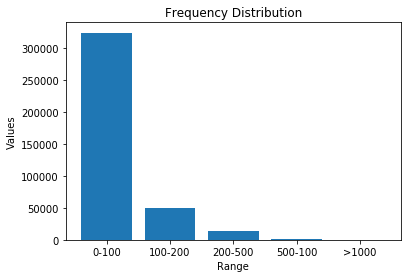

In [59]:
ticks = np.array(['0-100','100-200','200-500','500-100','>1000'])
x = [1,2,3,4,5]
y = np.array([l1,l2,l3,l4,l5])
plt.xticks(x,ticks)
plt.xlabel('Range')
plt.ylabel('Values')
plt.title('Frequency Distribution')
plt.bar(x,y)
plt.show()

In [60]:
[l1,l2,l3,l4,l5]

[323550, 48954, 14232, 1128, 175]